In [2]:
# Offline Data Collection with Random Policy

!python sumo_rl/collect_data.py \
  -net sumo_rl/nets/gangnam/gangnam_int2.net.xml \
  -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
  -seconds 86400 \
  -delta 60 \
  --teleport 300 \
  -out gangnam_data


Initializing environment with net: sumo_rl/nets/gangnam/gangnam_int2.net.xml
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 5ms, vehicles TOT 0 ACT 0 BUF 0)                      
 Retrying in 1 seconds
Starting data collection for 86400 seconds...
Step 100 completed.
Step 200 completed.
Step 300 completed.
Step 400 completed.
Step 500 completed.
Step 600 completed.
Step 700 completed.
Step 800 completed.
Step 900 completed.
Step 1000 completed.
Step 1100 completed.
Step 1200 completed.
Step 1300 completed.
Step 1400 completed.
Step #86400.00 (1ms ~= 1000.00*RT, ~41000.00UPS, TraCI: 11ms, vehicles TOT 37204 ACT 41 BU
Saved data for J0 to /Users/mac/Desktop/ST-FQI-main/sumo_rl/gangnam_data_J0.csv (1440 samples)


In [3]:
# ST-FQI Training

import os
import joblib
import pandas as pd
from sumo_rl.train_fqi import STFQI_Agent
from sumo_rl import SumoEnvironment
from sumo_rl.gangnam_utils import GangnamObservationFunction, gangnam_reward

# 1) offline dataset 
data_path = "sumo_rl/gangnam_data_J0.csv"
df_data = pd.read_csv(data_path)

# 2) action space
env = SumoEnvironment(
    net_file="sumo_rl/nets/gangnam/gangnam_int2.net.xml",
    route_file="sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml",
    use_gui=False,
    num_seconds=1000,
    reward_fn=gangnam_reward,
    observation_class=GangnamObservationFunction,
    single_agent=True,
    ts_ids=["J0"],
)
n_actions = env.action_spaces("J0").n
env.close()

# 3) ST-FQI training
tau_base = 0.05
n_iter_base = 20

agent = STFQI_Agent(
    tau_support=tau_base,
    gamma=0.95,
    n_iters=n_iter_base,
)
agent.fit_fqi(df_data, n_actions=n_actions)

os.makedirs("models_tau0p05_it20", exist_ok=True)
save_path = os.path.join("models_tau0p05_it20", "fqi_model_J0.joblib")
joblib.dump(agent, save_path)
print("Base ST-FQI model saved to:", save_path)


 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 7ms, vehicles TOT 0 ACT 0 BUF 0)                      
Fitting behavior model...
[ST-FQI] Behavior classifier log-loss: 0.702
Initializing Q-function...
[ST-FQI] Iter 1/20 done.
[ST-FQI] Iter 2/20 done.
[ST-FQI] Iter 3/20 done.
[ST-FQI] Iter 4/20 done.
[ST-FQI] Iter 5/20 done.
[ST-FQI] Iter 6/20 done.
[ST-FQI] Iter 7/20 done.
[ST-FQI] Iter 8/20 done.
[ST-FQI] Iter 9/20 done.
[ST-FQI] Iter 10/20 done.
[ST-FQI] Iter 11/20 done.
[ST-FQI] Iter 12/20 done.
[ST-FQI] Iter 13/20 done.
[ST-FQI] Iter 14/20 done.
[ST-FQI] Iter 15/20 done.
[ST-FQI] Iter 16/20 done.
[ST-FQI] Iter 17/20 done.
[ST-FQI] Iter 18/20 done.
[ST-FQI] Iter 19/20 done.
[ST-FQI] Iter 20/20 done.
Base ST-FQI model saved to: models_tau0p05_it20/fqi_model_J0.joblib


In [4]:
!python sumo_rl/evaluate_fqi.py \
  -net sumo_rl/nets/gangnam/gangnam_int2.net.xml \
  -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
  -seconds 12000 \
  -delta 60 \
  --teleport 300 \
  -models models_tau0p05_it20 \
  --out gangnam_eval_tau0p05_it20 \
  --ts_id J0


Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/../models_tau0p05_it20...
Loaded model for J0
 Retrying in 1 seconds
Starting evaluation for 12000 seconds...
Step #400.00Warning: Teleporting vehicle 'D-38_Outbound_20250101_00.0'; waited too long (jam), lane=':8555608444_0_0', time=400.00.
Step 100 completed.
Step #7700.00Warning: Teleporting vehicle 'D-38_Inbound_20250101_02.7'; waited too long (jam), lane=':8555608441_0_0', time=7700.00.
Step 200 completed.
Step #12000.00 (2ms ~= 500.00*RT, ~15500.00UPS, TraCI: 11ms, vehicles TOT 3779 ACT 31 BUF 
Evaluation finished.
Total Rewards: {'J0': -10740.0}
Saved metrics to gangnam_eval_tau0p05_it20


In [5]:
!python sumo_rl/evaluate_fqi.py \
  -net sumo_rl/nets/gangnam/gangnam_int2.net.xml \
  -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
  -seconds 12000 \
  -delta 60 \
  --teleport 300 \
  --baseline \
  --out gangnam_eval_random \
  --ts_id J0


Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 3ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/non_existent_dir...
 Retrying in 1 seconds
Starting evaluation for 12000 seconds...
Step 100 completed.
Step 200 completed.
Step #12000.00 (1ms ~= 1000.00*RT, ~30000.00UPS, TraCI: 8ms, vehicles TOT 3779 ACT 30 BUF 
Evaluation finished.
Total Rewards: {'J0': -24600.0}
Saved metrics to gangnam_eval_random_baseline


In [6]:
import os
os.chdir("/Users/mac/Desktop/ST-FQI-main")  # Revise to your Path

!python experiments/ql_gangnam_int.py \
    -net sumo_rl/nets/gangnam/gangnam_int2.net.xml \
    -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
    -delta 60 \
    -s 12000 \
    --ts_id J0 \
    --teleport 300 \
    -runs 5

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 3ms, vehicles TOT 0 ACT 0 BUF 0)                      
 Retrying in 1 seconds
Step #12000.00 (1ms ~= 1000.00*RT, ~24000.00UPS, TraCI: 29ms, vehicles TOT 3779 ACT 24 BUF
 Retrying in 1 seconds
Step #12000.00 (1ms ~= 1000.00*RT, ~27000.00UPS, TraCI: 15ms, vehicles TOT 3779 ACT 27 BUF
 Retrying in 1 seconds
Step #12000.00 (2ms ~= 500.00*RT, ~14500.00UPS, TraCI: 22ms, vehicles TOT 3779 ACT 29 BUF 
 Retrying in 1 seconds
Step #12000.00 (1ms ~= 1000.00*RT, ~27000.00UPS, TraCI: 15ms, vehicles TOT 3779 ACT 27 BUF
 Retrying in 1 seconds
Step #12000.00 (1ms ~= 1000.00*RT, ~23000.00UPS, TraCI: 14ms, vehicles TOT 3779 ACT 23 BUF


In [7]:
for run in range(1, 6):
    out_name = f"gangnam_eval_random_run{run}"
    !python sumo_rl/evaluate_fqi.py \
      -net sumo_rl/nets/gangnam/gangnam_int2.net.xml \
      -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
      -seconds 12000 \
      -delta 60 \
      --teleport 300 \
      --baseline \
      --out {out_name} \
      --ts_id J0


Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 5ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/non_existent_dir...
 Retrying in 1 seconds
Starting evaluation for 12000 seconds...
Step 100 completed.
Step 200 completed.
Step #12000.00 (1ms ~= 1000.00*RT, ~29000.00UPS, TraCI: 6ms, vehicles TOT 3779 ACT 29 BUF 
Evaluation finished.
Total Rewards: {'J0': -22560.0}
Saved metrics to gangnam_eval_random_run1_baseline
Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/non_existent_dir...
 Retrying in 1 seconds
Starting evaluation for 12000 seconds...
Step 100 completed.
Step 200 completed.
Step #12000.00 (1ms ~= 1000.00*RT, ~26000.00UPS, TraCI: 7ms, vehicles TOT 3779 ACT 26 BUF 
Evaluation finished.
Total Rewards: 

In [8]:
MODEL_DIR_ST = "models_tau0p05_it20"  # 위에서 저장한 디렉토리

for run in range(1, 6):
    out_name = f"gangnam_eval_stfqi_tau0p05_it20_run{run}"
    !python sumo_rl/evaluate_fqi.py \
      -net sumo_rl/nets/gangnam/gangnam_int2.net.xml \
      -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
      -seconds 12000 \
      -delta 60 \
      --teleport 300 \
      -models {MODEL_DIR_ST} \
      --out {out_name} \
      --ts_id J0


Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 3ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/../models_tau0p05_it20...
Loaded model for J0
 Retrying in 1 seconds
Starting evaluation for 12000 seconds...
Step #700.00Warning: Teleporting vehicle 'D-38_Outbound_20250101_00.0'; waited too long (yield), lane='218448824#12_0', time=700.00.
Step 100 completed.
Step 200 completed.
Step #12000.00 (1ms ~= 1000.00*RT, ~24000.00UPS, TraCI: 6ms, vehicles TOT 3779 ACT 24 BUF 
Evaluation finished.
Total Rewards: {'J0': -9060.0}
Saved metrics to gangnam_eval_stfqi_tau0p05_it20_run1
Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/../models_tau0p05_it20...
Loaded model for J0
 Retrying in 1 seconds
Starting evaluation f

In [9]:
from pathlib import Path

ql_files = sorted(Path("outputs/gangnam_int").glob("*_conn0_ep*.csv"))
ql_files  # ep1~ep5 확인


[PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep1.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep2.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep3.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep4.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep5.csv')]

In [10]:
import numpy as np
import pandas as pd
from pathlib import Path

ALPHA_OES = 1.0
BETA_OES  = 0.015
GAMMA_OES = 1.0

def compute_global_metrics(path, label):
    df = pd.read_csv(path)

    wait_col  = "system_total_waiting_time"
    tp_col    = "system_total_departed"
    stops_col = "system_total_stopped"

    total_wait  = df[wait_col].sum()
    total_tp    = df[tp_col].sum()
    total_stops = df[stops_col].sum()

    if total_tp > 0:
        awt = total_wait / total_tp
        ans = total_stops / total_tp
    else:
        awt = np.inf
        ans = np.inf

    tp  = total_tp
    oes = -ALPHA_OES * awt + BETA_OES * tp - GAMMA_OES * ans

    return {
        "label": label,
        "AWT": awt,
        "TP": tp,
        "ANS": ans,
        "OES": oes,
        "df": df,
    }

def compute_local_metrics(path, label):
    df = pd.read_csv(path)

    wait_col  = "J0_accumulated_waiting_time"
    tp_col    = "J0_departed" if "J0_departed" in df.columns else "system_total_departed"
    stops_col = "J0_stopped"

    total_wait  = df[wait_col].sum()
    total_tp    = df[tp_col].sum()
    total_stops = df[stops_col].sum()

    if total_tp > 0:
        awt_j = total_wait / total_tp
        ans_j = total_stops / total_tp
    else:
        awt_j = np.inf
        ans_j = np.inf

    oes_j = -ALPHA_OES * awt_j + BETA_OES * total_tp - GAMMA_OES * ans_j

    return {
        "label": label,
        "AWT_J": awt_j,
        "STOP_J": ans_j,
        "OES_J": oes_j,
        "df": df,
    }


In [11]:
from pathlib import Path

# Random: 우리가 위에서 사용한 out_prefix 기반 패턴
rand_pattern = "gangnam_eval_random_run*_baseline_conn0_ep1.csv"

# ST-FQI base (tau=0.05, it=20)
st_pattern   = "gangnam_eval_stfqi_tau0p05_it20_run*_conn0_ep1.csv"

# Q-learning: outputs/gangnam_int 에서 최신 experiment만 쓰고 싶으면,
ql_all = sorted(Path("outputs/gangnam_int").glob("*_conn0_ep*.csv"))
ql_pattern_list = ql_all  # ep1~ep5 다 사용
ql_all


[PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep1.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep2.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep3.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep4.csv'),
 PosixPath('outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep5.csv')]

In [12]:
def collect_oes(pattern_or_paths, label, use_paths_list=False, local=False):
    oes = []
    files = []

    if use_paths_list:
        paths = pattern_or_paths
    else:
        paths = sorted(Path(".").glob(pattern_or_paths))

    for p in paths:
        p = Path(p)
        files.append(str(p))
        if local:
            m = compute_local_metrics(str(p), label)
            oes.append(m["OES_J"])
        else:
            m = compute_global_metrics(str(p), label)
            oes.append(m["OES"])

    return np.array(oes, dtype=float), files


In [13]:
rand_oes, rand_files = collect_oes(rand_pattern, "Random", local=False)
st_oes,   st_files   = collect_oes(st_pattern,   "ST-FQI", local=False)
ql_oes,   ql_files   = collect_oes(ql_pattern_list, "Q-learning", use_paths_list=True, local=False)

print("Random files:", rand_files)
print("ST-FQI files:", st_files)
print("QL files:", ql_files)

print("Random global OES:", rand_oes)
print("ST-FQI global OES:", st_oes)
print("Q-learning global OES:", ql_oes)


Random files: ['gangnam_eval_random_run1_baseline_conn0_ep1.csv', 'gangnam_eval_random_run2_baseline_conn0_ep1.csv', 'gangnam_eval_random_run3_baseline_conn0_ep1.csv', 'gangnam_eval_random_run4_baseline_conn0_ep1.csv', 'gangnam_eval_random_run5_baseline_conn0_ep1.csv']
ST-FQI files: ['gangnam_eval_stfqi_tau0p05_it20_run1_conn0_ep1.csv', 'gangnam_eval_stfqi_tau0p05_it20_run2_conn0_ep1.csv', 'gangnam_eval_stfqi_tau0p05_it20_run3_conn0_ep1.csv', 'gangnam_eval_stfqi_tau0p05_it20_run4_conn0_ep1.csv', 'gangnam_eval_stfqi_tau0p05_it20_run5_conn0_ep1.csv']
QL files: ['outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep1.csv', 'outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep2.csv', 'outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep3.csv', 'outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep4.csv', 'outputs/gangnam_int/2025-11-29 21:28:15_alpha0.1_gamma0.99_ep

In [14]:
from scipy.stats import ttest_ind

def welch_test(x, y, name_x="X", name_y="Y"):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    if len(x) < 2 or len(y) < 2:
        print(f"[WARN] Not enough runs for Welch test ({name_x}={len(x)}, {name_y}={len(y)}).")
        return None
    t_stat, p_val = ttest_ind(x, y, equal_var=False)
    print(f"{name_x} vs {name_y}: t = {t_stat:.3f}, p = {p_val:.4f}")
    print(f"{name_x} mean ± std = {x.mean():.3f} ± {x.std(ddof=1):.3f}")
    print(f"{name_y} mean ± std = {y.mean():.3f} ± {y.std(ddof=1):.3f}")
    return t_stat, p_val

print("=== Global OES Welch tests ===")
welch_test(ql_oes, st_oes,   "Q-learning", "ST-FQI")
welch_test(st_oes, rand_oes, "ST-FQI",     "Random")


=== Global OES Welch tests ===
Q-learning vs ST-FQI: t = 18.031, p = 0.0001
Q-learning mean ± std = 6427.024 ± 0.005
ST-FQI mean ± std = 6426.348 ± 0.084
ST-FQI vs Random: t = -5.477, p = 0.0006
ST-FQI mean ± std = 6426.348 ± 0.084
Random mean ± std = 6426.651 ± 0.091


(np.float64(-5.477385870196751), np.float64(0.000604680949227365))

In [15]:
import joblib
from pathlib import Path

df_off = pd.read_csv("sumo_rl/gangnam_data_J0.csv")

# tau=0.05, it=20 모델
agent = joblib.load("models_tau0p05_it20/fqi_model_J0.joblib")


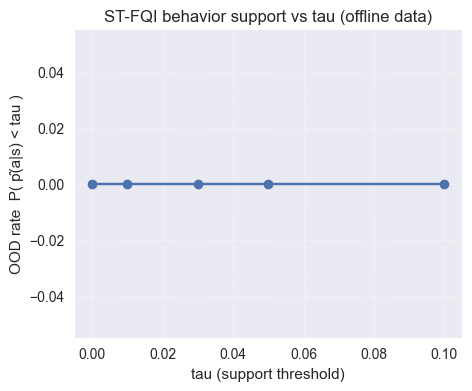

In [16]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")


def compute_ood_rates_on_dataset(agent, df, tau_list):
    s = df[["q","lam","neigh"]].values.astype(float)
    a = df["action_idx"].values.astype(int)

    ood_rates = []

    for tau in tau_list:
        if hasattr(agent, "tau"):
            agent.tau = tau
        support_mask, proba = agent._support_actions(s)
        p_chosen = proba[np.arange(len(a)), a]
        ood_rates.append((p_chosen < tau).mean())

    return np.array(ood_rates)

tau_list = [0.0, 0.01, 0.03, 0.05, 0.1]
ood_rates = compute_ood_rates_on_dataset(agent, df_off, tau_list)

plt.figure(figsize=(5,4))
plt.plot(tau_list, ood_rates, marker="o")
plt.xlabel("tau (support threshold)")
plt.ylabel("OOD rate  P( p̂(a|s) < tau )")
plt.title("ST-FQI behavior support vs tau (offline data)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


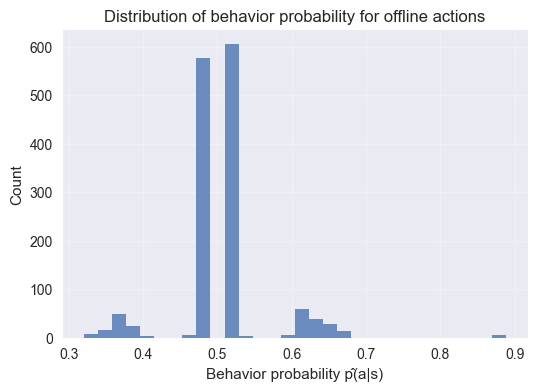

In [21]:
s = df_off[["q","lam","neigh"]].values.astype(float)
a = df_off["action_idx"].values.astype(int)
support_mask, proba = agent._support_actions(s)
p_chosen = proba[np.arange(len(a)), a]

plt.figure(figsize=(6,4))
plt.hist(p_chosen, bins=30, alpha=0.8)
plt.xlabel("Behavior probability p̂(a|s)")
plt.ylabel("Count")
plt.title("Distribution of behavior probability for offline actions")
plt.grid(True, alpha=0.3)
plt.show()


In [31]:
import os
import joblib
from pathlib import Path

taus = [0.0, 0.01, 0.03, 0.05]
n_iters_list = [10, 20, 40]

def tau_to_str(tau: float) -> str:
    return "tau" + str(tau).replace("0.", "0p").replace(".", "p")

for tau in taus:
    for n_iters in n_iters_list:
        tau_str = tau_to_str(tau)          # 예: tau0p05
        it_str  = f"it{n_iters}"           # 예: it20

        model_dir  = f"models_{tau_str}_{it_str}"         # models_tau0p05_it20
        out_prefix = f"gangnam_eval_{tau_str}_{it_str}"   # gangnam_eval_tau0p05_it20

        print("=" * 80)
        print(f"[TRAIN] tau={tau}, n_iters={n_iters}")
        print(f" model_dir  = {model_dir}")
        print(f" out_prefix = {out_prefix}")

        agent = STFQI_Agent(
            tau_support=tau,
            gamma=0.95,
            n_iters=n_iters,
        )
        agent.fit_fqi(df_data, n_actions=n_actions)

        os.makedirs(model_dir, exist_ok=True)
        save_path = os.path.join(model_dir, "fqi_model_J0.joblib")
        joblib.dump(agent, save_path)
        print(f"  -> model saved to {save_path}")

        eval_cmd = (
            "python sumo_rl/evaluate_fqi.py "
            "-net sumo_rl/nets/gangnam/gangnam_int2.net.xml "
            "-route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml "
            "-seconds 12000 "
            "-delta 60 "
            "--teleport 300 "
            f"-models {model_dir} "
            f"--out {out_prefix} "
            "-ts_id J0"
        )
        print("[EVAL]", eval_cmd)
        !{eval_cmd}

print("gangnam_eval_tau*_it*_conn0_ep1.csv generated")


[TRAIN] tau=0.0, n_iters=10
 model_dir  = models_tau0p0_it10
 out_prefix = gangnam_eval_tau0p0_it10
Fitting behavior model...
[ST-FQI] Behavior classifier log-loss: 0.694
Initializing Q-function...
[ST-FQI] Iter 1/10 done.
[ST-FQI] Iter 2/10 done.
[ST-FQI] Iter 3/10 done.
[ST-FQI] Iter 4/10 done.
[ST-FQI] Iter 5/10 done.
[ST-FQI] Iter 6/10 done.
[ST-FQI] Iter 7/10 done.
[ST-FQI] Iter 8/10 done.
[ST-FQI] Iter 9/10 done.
[ST-FQI] Iter 10/10 done.
  -> model saved to models_tau0p0_it10/fqi_model_J0.joblib
[EVAL] python sumo_rl/evaluate_fqi.py -net sumo_rl/nets/gangnam/gangnam_int2.net.xml -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml -seconds 12000 -delta 60 --teleport 300 -models models_tau0p0_it10 --out gangnam_eval_tau0p0_it10 -ts_id J0
usage: evaluate_fqi.py [-h] [-net NET_FILE] [-route ROUTE_FILE]
                       [-seconds SECONDS] [-delta DELTA_TIME]
                       [-models MODEL_DIR] [--baseline] [--out OUT_CSV_NAME]
                       [--ts_id TS_ID] [-

In [34]:
from pathlib import Path

taus = [0.0, 0.01, 0.03, 0.05]
n_iters_list = [10, 20, 40]

for tau in taus:
    for n_iters in n_iters_list:
        # 이름 포맷: tau0p0, tau0p01, ...
        tau_str = "tau" + str(tau).replace("0.", "0p").replace(".", "p")
        it_str  = f"it{n_iters}"

        model_dir  = f"models_{tau_str}_{it_str}"        
        out_prefix = f"gangnam_eval_{tau_str}_{it_str}"    # CSV prefix

        print("=" * 80)
        print(f"[EVAL ONLY] tau={tau}, n_iters={n_iters}")
        print(f" model_dir  = {model_dir}")
        print(f" out_prefix = {out_prefix}")

        eval_cmd = (
            "python sumo_rl/evaluate_fqi.py "
            "-net sumo_rl/nets/gangnam/gangnam_int2.net.xml "
            "-route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml "
            "-seconds 12000 "
            "-delta 60 "
            "--teleport 300 "
            f"-models {model_dir} "
            f"--out {out_prefix} "
            "--ts_id J0"
        )
        print("[EVAL]", eval_cmd)
        !{eval_cmd}

print("evaluation done")

[EVAL ONLY] tau=0.0, n_iters=10
 model_dir  = models_tau0p0_it10
 out_prefix = gangnam_eval_tau0p0_it10
[EVAL] python sumo_rl/evaluate_fqi.py -net sumo_rl/nets/gangnam/gangnam_int2.net.xml -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml -seconds 12000 -delta 60 --teleport 300 -models models_tau0p0_it10 --out gangnam_eval_tau0p0_it10 --ts_id J0
Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/../models_tau0p0_it10...
Loaded model for J0
 Retrying in 1 seconds
Starting evaluation for 12000 seconds...
Step 100 completed.
Step #7900.00Warning: Teleporting vehicle 'D-38_Inbound_20250101_02.16'; waited too long (jam), lane=':8555608441_0_1', time=7900.00.
Step 200 completed.
Step #12000.00 (0ms ?*RT. ?UPS, TraCI: 7ms, vehicles TOT 3779 ACT 35 BUF 0)               
Evaluation finished.
Total Rewards: {'J0': -8640.0}
Saved 

In [35]:
from pathlib import Path

sweep_files = sorted(Path(".").glob("gangnam_eval_tau*_it*_conn0_ep1.csv"))
sweep_files


[PosixPath('gangnam_eval_tau0p01_it10_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p01_it20_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p01_it40_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p03_it10_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p03_it20_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p03_it40_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p05_it10_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p05_it20_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p05_it40_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p0_it10_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p0_it20_conn0_ep1.csv'),
 PosixPath('gangnam_eval_tau0p0_it40_conn0_ep1.csv')]

In [36]:
rows = []
for p in sweep_files:
    name = p.name
    parts = name.split("_")  # ['gangnam','eval','tau0p05','it20','conn0','ep1.csv']
    tau_str = parts[2]       # 'tau0p05'
    it_str  = parts[3]       # 'it20'

    tau_val = float(tau_str.replace("tau","").replace("p","."))
    n_iters = int(it_str.replace("it",""))

    res = compute_global_metrics(str(p), f"STFQI_{tau_str}_{it_str}")
    rows.append({
        "tau": tau_val,
        "n_iters": n_iters,
        "label": res["label"],
        "OES": res["OES"],
        "AWT": res["AWT"],
        "TP": res["TP"],
        "ANS": res["ANS"],
    })

df_sweep = pd.DataFrame(rows).sort_values(["tau","n_iters"])
df_sweep


,tau,n_iters,label,OES,AWT,TP,ANS
9,0.00,10,STFQI_tau0p0_it10,6426.403947,0.802400,428481,0.008654
10,0.00,20,STFQI_tau0p0_it20,6426.390303,0.815887,428481,0.008810
11,0.00,40,STFQI_tau0p0_it40,6426.301907,0.903986,428481,0.009107
0,0.01,10,STFQI_tau0p01_it10,6426.397027,0.809233,428481,0.008740
1,0.01,20,STFQI_tau0p01_it20,6426.430956,0.775379,428481,0.008665
2,0.01,40,STFQI_tau0p01_it40,6426.092866,1.111961,428481,0.010173
3,0.03,10,STFQI_tau0p03_it10,6426.432151,0.774268,428481,0.008581
4,0.03,20,STFQI_tau0p03_it20,6426.239188,0.966822,428481,0.008990
5,0.03,40,STFQI_tau0p03_it40,6426.427794,0.778578,428481,0.008628
6,0.05,10,STFQI_tau0p05_it10,6426.285664,0.920022,428481,0.009314


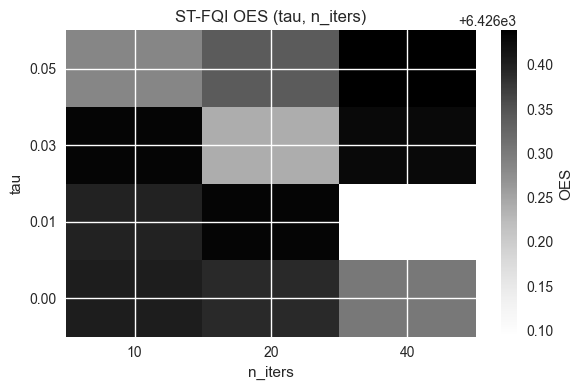

In [37]:
pivot = df_sweep.pivot(index="tau", columns="n_iters", values="OES")

plt.figure(figsize=(6,4))
im = plt.imshow(pivot.values, origin="lower", aspect="auto")
plt.colorbar(im, label="OES")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), [f"{t:.2f}" for t in pivot.index])
plt.xlabel("n_iters")
plt.ylabel("tau")
plt.title("ST-FQI OES (tau, n_iters)")
plt.tight_layout()
plt.show()


In [38]:
best_idx = df_sweep["OES"].idxmax()
best_row = df_sweep.loc[best_idx]
best_row


tau                      0.05
n_iters                    40
label      STFQI_tau0p05_it40
OES               6426.438921
AWT                  0.767465
TP                     428481
ANS                  0.008614
Name: 8, dtype: object

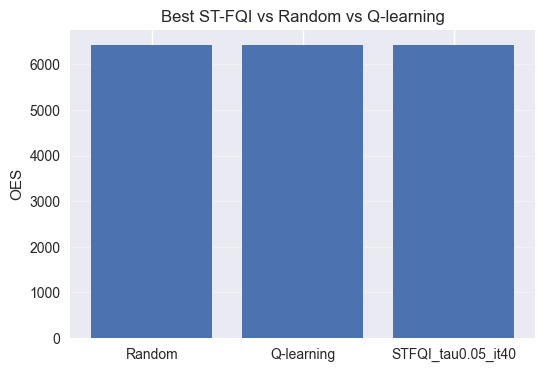

In [39]:
best_label = f"STFQI_tau{best_row['tau']:.2f}_it{best_row['n_iters']}"
comparison = {
    "Random": rand_oes.mean() if len(rand_oes) > 0 else np.nan,
    "Q-learning": ql_oes.mean() if len(ql_oes) > 0 else np.nan,
    best_label: best_row["OES"],
}

plt.figure(figsize=(6,4))
plt.bar(comparison.keys(), comparison.values())
plt.ylabel("OES")
plt.title("Best ST-FQI vs Random vs Q-learning")
plt.grid(axis="y", alpha=0.3)
plt.show()


In [40]:
random_file = "gangnam_eval_random_conn5_ep1.csv"           # Random baseline
ql_file     = "outputs/gangnam_int/2025-11-29 10:19:38_alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep1.csv"  # Q-learning
st_file     = "gangnam_eval_tau0p05_it20_conn0_ep1.csv"     # ST-FQI (tau=0.05, n_iters=20)


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

random_file = "gangnam_eval_random_run5_baseline_conn0_ep1.csv"
ql_dir = Path("outputs/gangnam_int")
ql_files = sorted(ql_dir.glob("*alpha0.1_gamma0.99_eps0.05_decay1.0_conn0_ep*.csv"))
ql_file     = ql_files[0] 
st_file     = "gangnam_eval_tau0p05_it40_conn0_ep1.csv"

ALPHA_OES = 1.0
BETA_OES  = 0.015
GAMMA_OES = 1.0

def calc_global(df):
    total_wait  = df["system_total_waiting_time"].sum()
    total_tp    = df["system_total_departed"].sum()
    total_stops = df["system_total_stopped"].sum()
    awt = total_wait / total_tp
    ans = total_stops / total_tp
    oes = -ALPHA_OES*awt + BETA_OES*total_tp - GAMMA_OES*ans
    return awt, ans, total_tp, oes

def calc_local(df):
    total_wait  = df["J0_accumulated_waiting_time"].sum()
    total_tp    = df["system_total_departed"].sum()   # 분모는 전체 출발 차량 수
    total_stops = df["J0_stopped"].sum()
    awt = total_wait / total_tp
    ans = total_stops / total_tp
    oes = -ALPHA_OES*awt + BETA_OES*total_tp - GAMMA_OES*ans
    return awt, ans, total_tp, oes

def metrics(path, label):
    df = pd.read_csv(path)
    awt_g, ans_g, tp_g, oes_g = calc_global(df)
    awt_l, ans_l, tp_l, oes_l = calc_local(df)
    return {
        "Policy": label,
        "Global_AWT": awt_g,
        "Global_ANS": ans_g,
        "Global_OES": oes_g,
        "Local_AWT": awt_l,
        "Local_ANS": ans_l,
        "Local_OES": oes_l,
        "df": df
    }

res_rand = metrics(random_file, "Random")
res_ql   = metrics(str(ql_file)
                   
                   
                   
                   ,     "Q-learning")
res_st   = metrics(st_file,     "ST-FQI")

results = [res_rand, res_ql, res_st]

df_metrics = pd.DataFrame(results)[[
    "Policy","Global_OES","Local_OES","Global_AWT","Local_AWT","Global_ANS","Local_ANS"
]]
df_metrics


,Policy,Global_OES,Local_OES,Global_AWT,Local_AWT,Global_ANS,Local_ANS
0,Random,6426.665956,6427.131216,0.541273,0.082848,0.007772,0.000936
1,Q-learning,6427.025554,6427.178144,0.184757,0.035978,0.004689,0.000878
2,ST-FQI,6426.438921,6427.184264,0.767465,0.030410,0.008614,0.000327


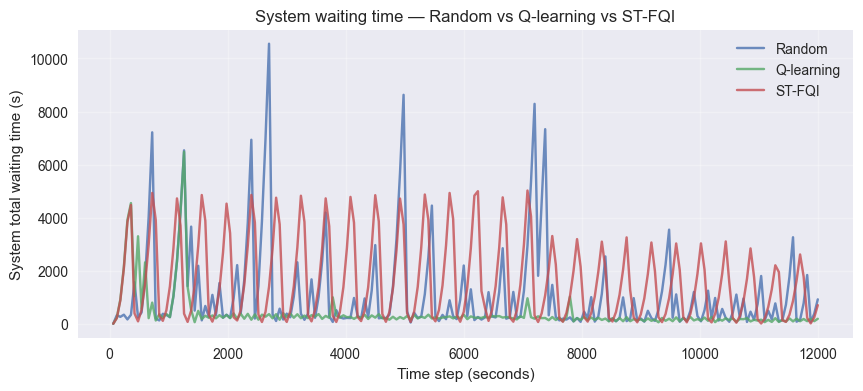

In [53]:
plt.figure(figsize=(10,4))
for r in results:
    df = r["df"]
    plt.plot(df["step"], df["system_total_waiting_time"],
             label=r["Policy"], alpha=0.8)
plt.xlabel("Time step (seconds)")
plt.ylabel("System total waiting time (s)")
plt.title("System waiting time — Random vs Q-learning vs ST-FQI")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


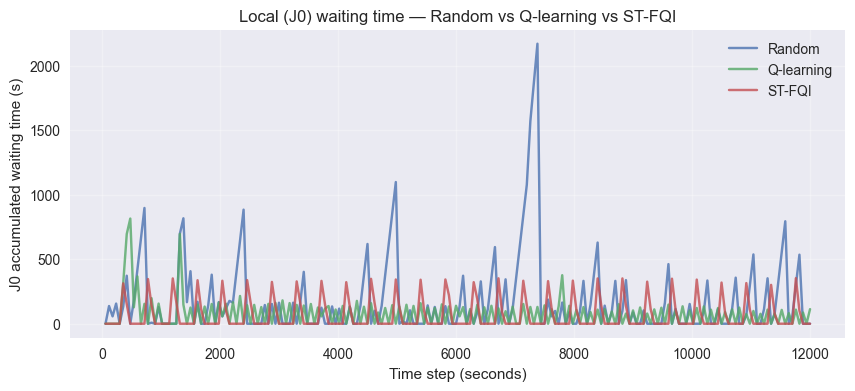

In [54]:
plt.figure(figsize=(10,4))
for r in results:
    df = r["df"]
    plt.plot(df["step"], df["J0_accumulated_waiting_time"],
             label=r["Policy"], alpha=0.8)
plt.xlabel("Time step (seconds)")
plt.ylabel("J0 accumulated waiting time (s)")
plt.title("Local (J0) waiting time — Random vs Q-learning vs ST-FQI")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


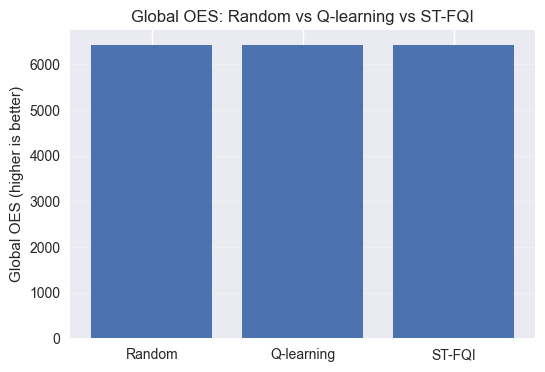

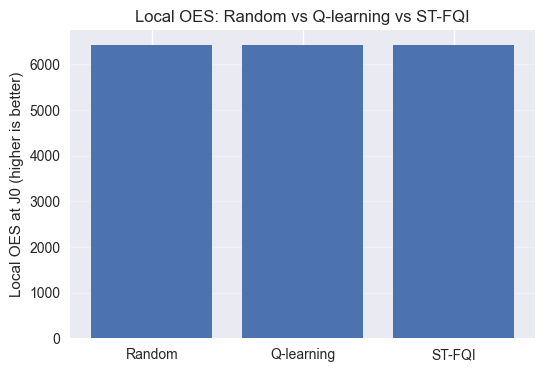

In [55]:
plt.figure(figsize=(6,4))
plt.bar(df_metrics["Policy"], df_metrics["Global_OES"])
plt.ylabel("Global OES (higher is better)")
plt.title("Global OES: Random vs Q-learning vs ST-FQI")
plt.grid(axis="y", alpha=0.3)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(df_metrics["Policy"], df_metrics["Local_OES"])
plt.ylabel("Local OES at J0 (higher is better)")
plt.title("Local OES: Random vs Q-learning vs ST-FQI")
plt.grid(axis="y", alpha=0.3)
plt.show()


In [57]:
!python sumo_rl/evaluate_fqi.py \
  -net   sumo_rl/nets/gangnam/gangnam_int2.net.xml \
  -route sumo_rl/nets/gangnam/gangnam_int_scaled.rou.xml \
  -seconds 3600 \
  -delta   60 \
  --teleport 300 \
  -models models_tau0p05_it20 \
  --ts_id J0 \
  --out stfqi_gui_demo \
  --gui


Initializing environment for evaluation...
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
Loading models from /Users/mac/Desktop/ST-FQI-main/sumo_rl/../models_tau0p05_it20...
Loaded model for J0
 Retrying in 1 seconds
Starting evaluation for 3600 seconds...
Evaluation finished.
Total Rewards: {'J0': -2760.0}
Saved metrics to stfqi_gui_demo
